<h1><center>Laboratorio 8: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza y Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano y Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Eduardo Moya
- Nombre de alumno 2: Nicolás Ojeda


### **Link de repositorio de GitHub:** [https://github.com/eduardomoyab/MDS7202_1](https://github.com/eduardomoyab/MDS7202_1)

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [128]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

#Libreria para plotear
#!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Clasificadores
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.csv`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [3]:
df_players = pd.read_csv('stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [4]:
#Creamos un label de seleccion donde tome valor 0  si National_Position es Nulo, y 1 si no es nulo
df_players['Seleccion'] = df_players['National_Position'].notnull().astype(int)
#Vemos la cantidad de valores para cada clase en seleccion
df_players['Seleccion'].value_counts()

Seleccion
0    16513
1     1075
Name: count, dtype: int64

### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="900">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [X] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [X] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [X] Crear 3 ``pipelines`` con diferentes clasificadores.
- [X] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [X] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

**Respuesta:**

Observando el reporte de ```Player_Stats_Report.html``` se puede observar en primera instancia que existen 2 tipos de variable: Categóricas y Numéricas. Sin embargo, gracias al análisis de los datos, se puede observar que las variables Weak_foot y Skill_Moves corresponden a variables ordinales, puesto que si bien son categorías, estas van ordenadas en un orden creciente, de forma que con 1 se tiene el menor nivel de la variable (pie debil o movimientos hábiles) y con valor 5 se tiene el mayor nivel.
Adicionalmente, es posible identificar variables categóricas que poseen un gran número de categorías o alta cardinalidad, como lo son las variables Name y Nationality, por lo que estas seran consideradas variables de tipo texto y no categóricas. También se tiene la variable National_Position, de la cual se obtuvo el label Seleccion, por ende, esta tambien se incluirá en las variables tipo texto. Estas no serán procesadas con el ColumnTransformer.
En cuanto a las variables numéricas, si bien existe una gran correlación entre algunas de estas, si serán consideradas para aplican un ColumnTransformer. 

Por ende, se definen los conjuntos:

In [33]:
categoricas = ['Club_Position','Preffered_Foot','Work_Rate']
ordinales = ['Weak_foot','Skill_Moves']
#Ahora seleccionamos las columnas numericas de df_players
numericas = df_players.select_dtypes(include=['int64','float64']).columns
#Eliminamos Weak_foot y Skill_Moves de numericas
numericas = numericas.drop(['Weak_foot','Skill_Moves'])

label = ['Seleccion']

#Seleccionamos las columnas restantes que no estan en los conjuntos anteriores
restantes = df_players.columns.difference(categoricas).difference(ordinales).difference(numericas)

Ahora aplicamos el ColumnTransformer

In [88]:
ct = ColumnTransformer(
    [
        ('Cat',OneHotEncoder(sparse_output=False),categoricas),
        ('Ord',OrdinalEncoder(), ordinales),
        ('Num',MinMaxScaler(),numericas)
    ],
    remainder='passthrough'
)

Ahora considerando la guía, considerando que es un problema de clasificación y se tiene que el número de muestras del dataset es de 17588 < 100K, se utiliza LinearSVC. Además, como la variable de interés es binaria y las variables de texto no se consideran para el procesamiento, se utiliza KNeighborsClassifier. Adicionalmente se utiliza un clasificador de ensamble, particularmente el modelo Random Forest.

In [89]:
Pipeline_SVC = Pipeline(steps=[
                      ("pre-procesamiento", ct),
                      ("model",LinearSVC(random_state=42) )
])

Pipeline_KNeighbors = Pipeline(steps=[
                      ("pre-procesamiento", ct),
                      ("model",KNeighborsClassifier() )
])

Pipeline_RF = Pipeline(steps=[
                      ("pre-procesamiento", ct),
                      ("model",RandomForestClassifier(random_state=42) )
])

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [X] Separar el conjunto de datos en entrenamiento y de prueba.
- [X] Entrenar los `pipelines`.
- [X] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

In [50]:
y = df_players[label]
x = df_players.drop(columns=restantes)
#75% entrenamiento y 25% test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

Ahora entrenamos los 3 Pipelines

Modelo LinearSVC


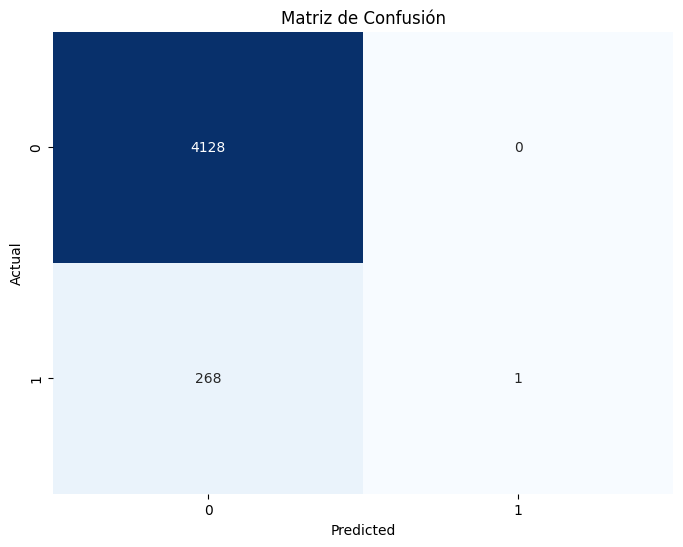

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4128
           1       1.00      0.00      0.01       269

    accuracy                           0.94      4397
   macro avg       0.97      0.50      0.49      4397
weighted avg       0.94      0.94      0.91      4397

F1-Score: 0.007407407407407408


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#LinearSVC

#Entrenamos el modelo
Pipeline_SVC.fit(X_train, y_train)

#Ahora predecimos
y_pred = Pipeline_SVC.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Informe de clasificación
class_report = classification_report(y_test, y_pred, zero_division=1)


# Plot de la matriz de confusión
print('Modelo LinearSVC')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=Pipeline_SVC.classes_, yticklabels=Pipeline_SVC.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
# Informe de clasificación
class_report = classification_report(y_test, y_pred, zero_division=1)
print("Informe de clasificación:\n", class_report)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)



Modelo KNeighborsClassifier


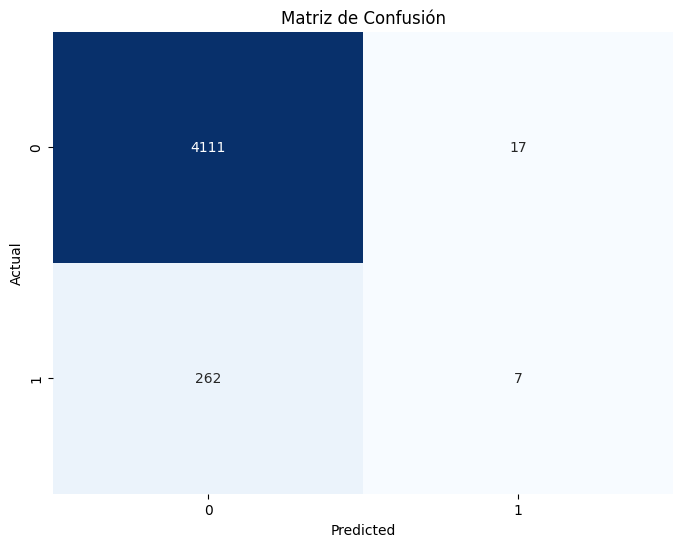

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4128
           1       0.29      0.03      0.05       269

    accuracy                           0.94      4397
   macro avg       0.62      0.51      0.51      4397
weighted avg       0.90      0.94      0.91      4397

F1-Score: 0.0477815699658703


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#KNNeighborsClassifier

#Entrenamos el modelo
Pipeline_KNeighbors.fit(X_train, y_train)

#Ahora predecimos
y_pred = Pipeline_KNeighbors.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Informe de clasificación
class_report = classification_report(y_test, y_pred, zero_division=1)


# Plot de la matriz de confusión
print('Modelo KNeighborsClassifier')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=Pipeline_KNeighbors.classes_, yticklabels=Pipeline_KNeighbors.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
# Informe de clasificación
class_report = classification_report(y_test, y_pred, zero_division=1)
print("Informe de clasificación:\n", class_report)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)


Resultados Random Forest


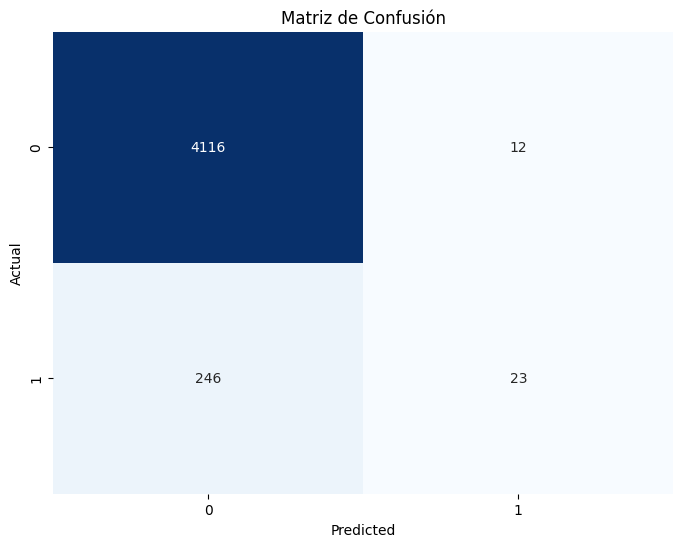

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4128
           1       0.66      0.09      0.15       269

    accuracy                           0.94      4397
   macro avg       0.80      0.54      0.56      4397
weighted avg       0.93      0.94      0.92      4397

F1-Score: 0.1513157894736842


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#Random Forest

#Entrenamos el modelo
Pipeline_RF.fit(X_train, y_train)

#Ahora predecimos
y_pred = Pipeline_RF.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Informe de clasificación
class_report = classification_report(y_test, y_pred, zero_division=1)

# Plot de la matriz de confusión
print('Resultados Random Forest')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=Pipeline_RF.classes_, yticklabels=Pipeline_RF.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
# Informe de clasificación
class_report = classification_report(y_test, y_pred, zero_division=1)
print("Informe de clasificación:\n", class_report)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)


**Respuesta**:

### LinearSVC

En la matriz de confusión para el modelo LinearSVC, observamos que la mayoría de las predicciones se concentran en la clase negativa, con 4128 registros correctamente clasificados como negativos y 0 falsos positivos. Sin embargo, la clase positiva tiene un rendimiento deficiente, con solo 1 instancia correctamente clasificada y 268 falsos negativos.

El accuracy del modelo es del 94%, lo que indica que el 94% de las predicciones son correctas en general. Sin embargo, este valor puede ser engañoso debido al desbalance de clases, ya que el modelo parece estar favoreciendo la predicción de la clase mayoritaria.

En cuanto a la clase positiva (seleccionado nacional), la precision es del 100%, lo que indica que cuando el modelo predice que un jugador es seleccionado nacional, en el 100% de los casos es correcto. Sin embargo, el recall es del 0%, lo que significa que el modelo no identifica correctamente ningún caso positivo entre todas las instancias realmente positivas. Este bajo recall se refleja en el bajo valor de F1-score: 0.0074, que es una medida proveniente del precision y recall. Por ende, aunque el modelo es preciso para la clase negativa, su rendimiento en la clase positiva es deficiente, indicando dificultades para identificar adecuadamente a los jugadores seleccionados.

### KNeighbors

En la matriz de confusión para el modelo KNeighbors, podemos observar que al igual que el modelo LinearSVC, la mayoría de las predicciones se concentran en la clase negativa, con 4111 registros correctamente clasificados como negativas y 17 falsos positivos. Sin embargo, la clase positiva muestra una mejora en comparación con LinearSVC, con 7 instancias correctamente clasificadas y 262 falsos negativos.

El accuracy del modelo es del 94%, al igual que LinearSVC, indicando que el 94% de las predicciones son correctas en general. Sin embargo, similar al caso anterior, este valor puede ser engañoso debido al desbalance de clases.

En relación con la clase positiva, la precision es del 29%, lo que indica que cuando el modelo predice que un jugador es seleccionado, en el 29% de los casos es correcto. El recall es del 3%, indicando que el modelo identifica correctamente solo el 3% de los casos positivos entre todas los registros realmente positivos. El F1-score es de 0.0478, una mejora respecto a LinearSVC, pero sigue siendo de baja magnitud. En resumen, aunque KNeighbors mejora la identificación de la clase positiva en comparación con LinearSVC, aún tiene dificultades significativas para clasificar adecuadamente a los jugadores seleccionados.


### Random Forest

En la matriz de confusión para el modelo RandomForest, se observa que la mayoría de las predicciones se encuentran en la clase negativa, con 4116 regitros correctamente clasificados como negativos y 12 falsos positivos. La clase positiva muestra una mejora considerable en comparación con los modelos anteriores, con 23 instancias correctamente clasificadas y 246 falsos negativos.

El accuracy del modelo es del 94%, similar a los modelos anteriores, indicando que el 94% de las predicciones son correctas en general. Sin embargo, al igual que en los casos anteriores, se debe tener precaución con este valor, ya que podría estar sesgado debido al desbalance de clases.

En relación con la clase positiva, la precision es del 66%, lo que indica que cuando el modelo predice que un jugador es seleccionado, en el 66% de los casos es correcto. El recall es del 9%, indicando que el modelo identifica correctamente el 9% de los casos positivos entre todas las instancias realmente positivas. El F1-score es de 0.1513, una mejora significativa en comparación con los modelos anteriores. En este caso, RandomForest muestra un rendimiento relativamente mejor en términos de precision de la clase positiva y F1-score, indicando una capacidad mejorada para clasificar adecuadamente a los jugadores seleccionados nacionalmente. Sin embargo, aún enfrenta dificultades significativas debido al desequilibrio de clases.


### Mejorar Resultados y Cantidad de Ejemplos por Clase

Analizando los resultados de los tres modelos, se observa que todos tienen un alto accuracy del 94%. Sin embargo, al examinar en detalle la matriz de confusión y las métricas de precision, recall y F1-score para la clase positiva, se revela un desempeño deficiente en la identificación de estos casos.

Para mejorar estos resultados, se sugiere explorar diversas estrategias, como el ajuste de hiperparámetros puesto que en estos casos se utilizaron los valores por defecto en cada clasificador. Adicionalmente, dado el desbalance de clases, estrategias como oversampling de la clase minoritaria (positiva), asignación de pesos a las clases o el uso de modelos de ensamble diseñados para manejar datos desbalanceados, como BalancedRandomForestClassifier, podrían ser más efectivas. Estas medidas buscan corregir el sesgo hacia la clase mayoritaria y mejorar la capacidad del modelo para identificar casos positivos. También se podría realizar una disminución de variables en base a la correlación entre estas, ya que como se mencionó anteriormente, existe una gran correlación entre variables numéricas preprocesadas en este ejercicio, que pese a ello se mantuvieron para la predicción. 

En cuanto a la influencia de la cantidad de ejemplos por clase, es evidente que el desequilibrio afecta negativamente el rendimiento en la identificación de casos positivos. Estrategias como oversampling y asignación de pesos están diseñadas específicamente para abordar este problema y podrían conducir a mejoras significativas en la capacidad del modelo para manejar datos desbalanceados.


## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [X] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [X] Cuente cuantos por clase quedan.
- [X] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [X] Comente los resultados obtenidos.

**Respuesta:**

In [84]:

#diccionario de mapeo
mapping_dict = {
    'ST': 'ataque', 'CF': 'ataque',
    'RW': 'central_ataque', 'CAM': 'central_ataque', 'LW': 'central_ataque',
    'RM': 'central', 'CM': 'central', 'LM': 'central',
    'RWB': 'central_defensa', 'CDM': 'central_defensa', 'LWB': 'central_defensa',
    'RB': 'defensa', 'CB': 'defensa', 'LB': 'defensa', 'GK': 'arquero'
}

df_players_2 = df_players.copy()
# Aplica el reemplazo utilizando el diccionario de mapeo
df_players_2['Posicion'] = df_players_2['Club_Position'].replace(mapping_dict)

# Filtra solo las filas que están en el diccionario de mapeo
df_players_2 = df_players_2[df_players_2['Posicion'].isin(mapping_dict.values())]
#Vemos la cantidad de registros por clase
df_players_2['Posicion'].value_counts()

Posicion
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64

En este caso nuevamente se tiene un problema de clasificación con menos de 100k datos, por ende se utiliza LinearSVC. Nuevamente se tiene que los datos no son de tipo texto, por ende se utiliza KNeighborsClassifier. Considerando los resultados anteriores, tambien se decide implementar un clasificador de ensamblado, específicamente el modelo Random Forest.  

Modificamos el tipo de datos para el Pipeline

In [115]:
categoricas = ['Preffered_Foot','Work_Rate']
ordinales = ['Weak_foot','Skill_Moves']
#Ahora seleccionamos las columnas numericas de df_players
numericas = df_players_2.select_dtypes(include=['int64','float64']).columns
#Eliminamos Weak_foot y Skill_Moves de numericas
numericas = numericas.drop(['Weak_foot','Skill_Moves'])

label = ['Posicion']

#Seleccionamos las columnas restantes que no estan en los conjuntos anteriores
restantes = df_players_2.columns.difference(categoricas).difference(ordinales).difference(numericas)

In [116]:
y = df_players_2[label]
X = df_players_2.drop(columns=restantes)
#75% entrenamiento y 25% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

Definimos nuevamente el Pipeline

In [117]:
ct = ColumnTransformer(
    [
        ('Cat',OneHotEncoder(sparse_output=False),categoricas),
        ('Ord',OrdinalEncoder(), ordinales),
        ('Num',MinMaxScaler(),numericas)
    ],
    remainder='passthrough'
)


Pipeline_SVC = Pipeline(steps=[
                      ("pre-procesamiento", ct),
                      ("model",LinearSVC(random_state=42) )
])

Pipeline_KNeighbors = Pipeline(steps=[
                      ("pre-procesamiento", ct),
                      ("model",KNeighborsClassifier() )
])

Pipeline_RF = Pipeline(steps=[
                      ("pre-procesamiento", ct),
                      ("model",RandomForestClassifier(random_state=42) )
])

Modelo LinearSVC


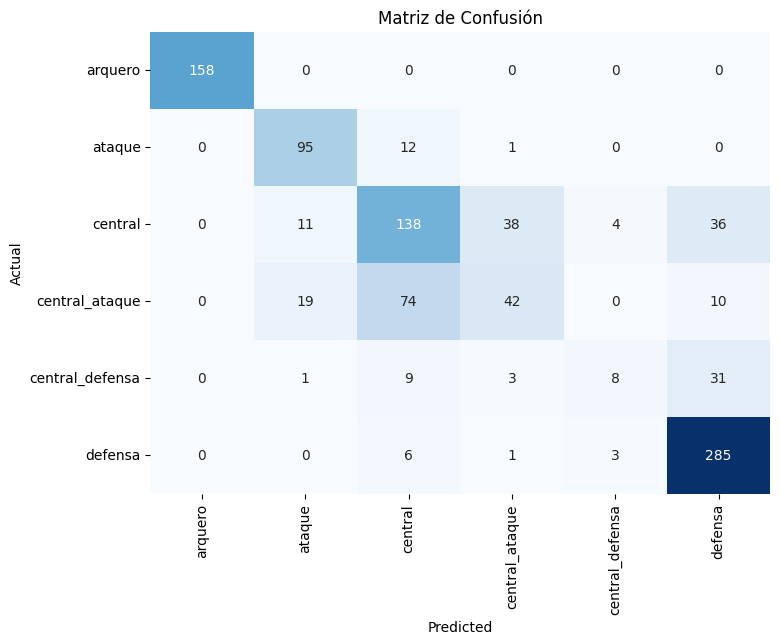

[[158   0   0   0   0   0]
 [  0  95  12   1   0   0]
 [  0  11 138  38   4  36]
 [  0  19  74  42   0  10]
 [  0   1   9   3   8  31]
 [  0   0   6   1   3 285]]
Informe de clasificación:
                  precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       158
         ataque       0.75      0.88      0.81       108
        central       0.58      0.61      0.59       227
 central_ataque       0.49      0.29      0.37       145
central_defensa       0.53      0.15      0.24        52
        defensa       0.79      0.97      0.87       295

       accuracy                           0.74       985
      macro avg       0.69      0.65      0.65       985
   weighted avg       0.71      0.74      0.71       985

Macro F1-Score : 0.6459739600344667


In [118]:
#LinearSVC

#Entrenamos el modelo
Pipeline_SVC.fit(X_train, y_train)

#Ahora predecimos
y_pred = Pipeline_SVC.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Informe de clasificación
class_report = classification_report(y_test, y_pred, zero_division=1)

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')

# Plot de la matriz de confusión
print('Modelo LinearSVC')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=Pipeline_SVC.classes_, yticklabels=Pipeline_SVC.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
print(conf_matrix)
# Informe de clasificación
class_report = classification_report(y_test, y_pred, zero_division=1)
print("Informe de clasificación:\n", class_report)

# F1-Score
f1 = f1_score(y_test, y_pred, average='macro')

print("Macro F1-Score :", f1)



Modelo KNeighborsClassifier


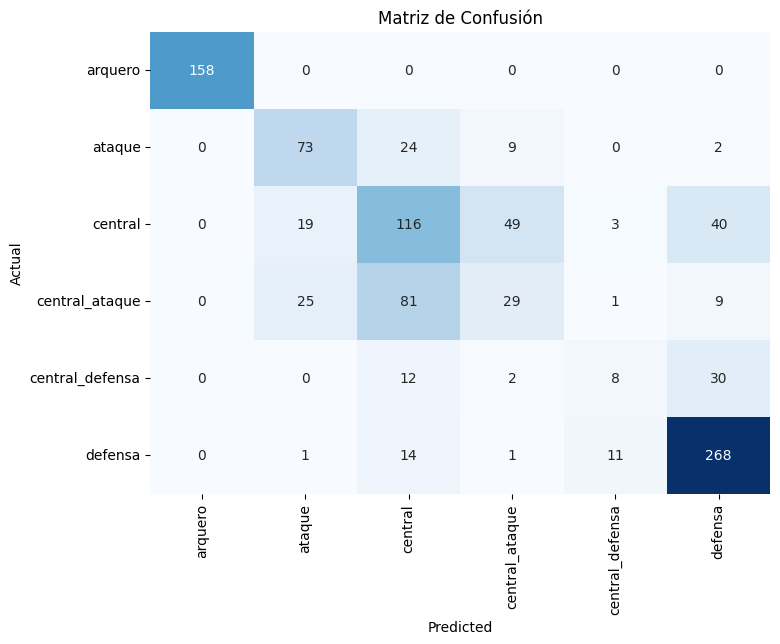

[[158   0   0   0   0   0]
 [  0  73  24   9   0   2]
 [  0  19 116  49   3  40]
 [  0  25  81  29   1   9]
 [  0   0  12   2   8  30]
 [  0   1  14   1  11 268]]
Informe de clasificación:
                  precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       158
         ataque       0.62      0.68      0.65       108
        central       0.47      0.51      0.49       227
 central_ataque       0.32      0.20      0.25       145
central_defensa       0.35      0.15      0.21        52
        defensa       0.77      0.91      0.83       295

       accuracy                           0.66       985
      macro avg       0.59      0.57      0.57       985
   weighted avg       0.63      0.66      0.64       985

Macro F1-Score: 0.5713181927543145


In [119]:
#KNNeighborsClassifier

#Entrenamos el modelo
Pipeline_KNeighbors.fit(X_train, y_train)

#Ahora predecimos
y_pred = Pipeline_KNeighbors.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Informe de clasificación
class_report = classification_report(y_test, y_pred, zero_division=1)


# Plot de la matriz de confusión
print('Modelo KNeighborsClassifier')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=Pipeline_KNeighbors.classes_, yticklabels=Pipeline_KNeighbors.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
print(conf_matrix)
# Informe de clasificación
class_report = classification_report(y_test, y_pred, zero_division=1)
print("Informe de clasificación:\n", class_report)

# F1-Score
f1 = f1_score(y_test, y_pred,average='macro')
print("Macro F1-Score:", f1)


Resultados Random Forest


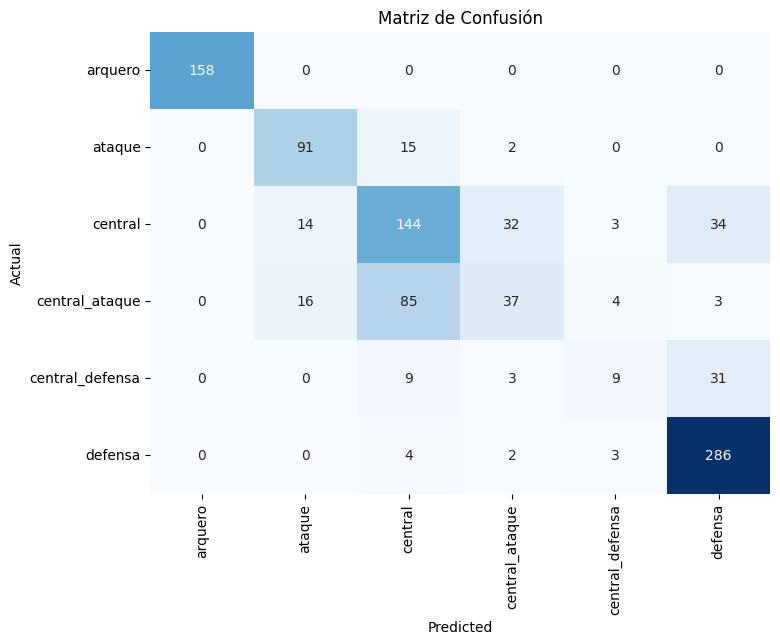

[[158   0   0   0   0   0]
 [  0  91  15   2   0   0]
 [  0  14 144  32   3  34]
 [  0  16  85  37   4   3]
 [  0   0   9   3   9  31]
 [  0   0   4   2   3 286]]
Informe de clasificación:
                  precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       158
         ataque       0.75      0.84      0.79       108
        central       0.56      0.63      0.60       227
 central_ataque       0.49      0.26      0.33       145
central_defensa       0.47      0.17      0.25        52
        defensa       0.81      0.97      0.88       295

       accuracy                           0.74       985
      macro avg       0.68      0.65      0.64       985
   weighted avg       0.71      0.74      0.71       985

Macro F1-Score: 0.643253305927465


In [120]:
#Random Forest

#Entrenamos el modelo
Pipeline_RF.fit(X_train, y_train)

#Ahora predecimos
y_pred = Pipeline_RF.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Informe de clasificación
class_report = classification_report(y_test, y_pred, zero_division=1)

# Plot de la matriz de confusión
print('Resultados Random Forest')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=Pipeline_RF.classes_, yticklabels=Pipeline_RF.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
print(conf_matrix)
# Informe de clasificación
class_report = classification_report(y_test, y_pred, zero_division=1)
print("Informe de clasificación:\n", class_report)

# F1-Score
f1 = f1_score(y_test, y_pred,average='macro')
print("Macro F1-Score:", f1)

**Respuesta**:

### LinearSVC

En la evaluación del modelo LinearSVC, la matriz de confusión revela ciertos patrones de clasificación para cada clase. El modelo logra clasificar perfectamente la clase "arquero", evidenciado por ceros en la fila correspondiente a falsos positivos y falsos negativos. Sin embargo, enfrenta dificultades significativas en las clases "central_ataque" y "central_defensa", con bajos valores de precision y recall.

El accuracy global del modelo es del 74%, sugiriendo un rendimiento aceptable en la clasificación general. No obstante, este valor podría ser engañoso debido al desequilibrio de clases, donde algunas categorías son menos frecuentes que otras como es el caso de central_defensa.

Al examinar las métricas para cada clase, se destaca la variabilidad en el rendimiento. La clase ataque muestra una precision y recall del 75% y 88% respectivamente, mostrando una capacidad para identificar y clasificar esta categoría de forma correcta. En contraste, las clases "central_ataque" y "central_defensa" presentan desafíos, con precisiones del 49% y 53%, y recalls del 29% y 15% respectivamente. Estos resultados sugieren la necesidad de mejoras específicas para estas clases.

En términos del F1-score macro, que proporciona una medida equilibrada del rendimiento global, se obtiene un valor de 0.65. Este indicador revela un rendimiento moderado, pero resalta la importancia de considerar el equilibrio entre precision y recall, especialmente en un contexto donde el desbalance de clases puede afectar la interpretación del modelo.

De esta forma, el modelo LinearSVC muestra un buen desempeño en solo algunas categorías, registrando dificultades en otras como central_defensa, la cual particularmente presenta un desbalance.

### KNeighbors

En la evaluación del modelo KNeighbors, es posible apreciar una capacidad adecuada para clasificar la clase "arquero", alcanzando valores perfectos en precision y recall. Sin embargo, presenta dificultades en las clases "central_ataque" y "central_defensa", donde la precisión y el recall son relativamente bajos.

El accuracy global del modelo es del 66%, indicando que el 66% de las predicciones son correctas en general. Al igual que en los casos anteriores, este valor puede verse afectado por el desbalance de algunas clases.

Examinando las métricas específicas para cada clase, se destaca la variabilidad en el rendimiento. La clase "ataque" muestra una precision del 62% y un recall del 68%, indicando una capacidad relativamente aceptable para clasificar esta categoría. Sin embargo, las clases "central_ataque" y "central_defensa" presentan dificultades, con precisiones del 32% y 35%, y recalls del 20% y 15%, respectivamente. Estos resultados sugieren la necesidad de mejoras específicas para estas clases.

El F1-score macro se sitúa en 0.57. Este valor indica un rendimiento moderado, pero resalta la importancia de considerar tanto precision como recall en el contexto del desbalance de clases.

### Random Forest

En la evaluación del modelo Random Forest, se muestra un buen rendimiento en la clase arquero, logrando valores perfectos en precision y recall. Sin embargo, nuevamente enfrenta dificultades en las clases "central_ataque" y "central_defensa", donde la precisión y el recall son relativamente bajos.

El accuracy global del modelo es del 74%, indicando que el 74% de las predicciones son correctas en general. Como en casos anteriores, este valor podría verse afectado por el desbalance de algunas clases, aunque este valor incrementó con respecto a los anteriores clasificadores.

En cuanto a las métricas específicas de cada clase, nuevamente se observa una variabilidad en el rendimiento. La clase "ataque" muestra una precision del 75% y un recall del 84%, indicando una gran capacidad para clasificar esta categoría de forma correcta. Sin embargo, las clases "central_ataque" y "central_defensa" presentan desempeños relativamente bajos, con precisiones del 49% y 47%, y recalls del 26% y 17%, respectivamente. Estos resultados al igual que los casos anteriores, sugieren la necesidad de mejoras específicas para estas clases.

El F1-score macro se sitúa en 0.64. Este valor indica un rendimiento moderado, similar también a los clasificadores anteriores, donde el desbalance de clases puede afectar a la interpretación de este modelo.


### Mejoras de resultados

El análisis de los modelos LinearSVC, KNeighbors y Random Forest revela patrones de rendimiento y dificultades específicas en la clasificación de diferentes clases en el conjunto de datos. En general, se observa una variabilidad en la capacidad de los modelos para clasificar ciertas categorías, lo que sugiere la posibilidad de mejoras enfocando las clases de forma particular.

La mejora de los resultados podría explorarse a través de varias estrategias. En primer lugar, ajustar los hiperparámetros de los modelos, lo que podría influir positivamente en el rendimiento.

Además, dada la presencia de clases desbalanceadas como central_defensa, estrategias específicas para abordar este problema podrían ser beneficiosas. El uso de técnicas de muestreo, como oversampling de las clases minoritarias o la asignación de pesos diferenciados durante el entrenamiento, podría mejorar la capacidad de los modelos para clasificar correctamente instancias de clases menos frecuentes.

La influencia de la cantidad de ejemplos por clase también es un aspecto a considerar. En situaciones donde hay un número limitado de ejemplos para ciertas clases, los modelos pueden tener dificultades para aprender patrones representativos. En este caso, pese a ser un problema multiclase, se repiten los mismos problemas que en el caso anterior de clasificación binaria.


## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [X] Explique en que consiste la métrica $R^2$
- [X] Generar un pipeline para la regresión.
- [X] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [X] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

### Métrica $R^2$   

El coeficiente de determinación $R^2$ es una métrica utilizada para evaluar el rendimiento de un modelo de regresión. Esta métrica se centra en medir y explicar la proporción de la variabilidad en la variable dependiente puede ser explicada por el modelo.

La ecuación para calcular R^2 se expresa como:

$$ R² = 1 - \frac{SSR}{SST} $$

 

donde:

- $R^2$ es el coeficiente de determinación.
- SSR es la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo.
- SST es la suma de los cuadrados de las diferencias entre los valores observados y la media de los valores observados.

La interpretación de R^2 se realiza considerando la proporción de variabilidad explicada. Un $R^2$ con un valor igual o cercano a 1 indica que el modelo explica una gran proporción de la variabilidad, mientras que un $R^2$ igual o cercano a 0 indica que el modelo tiene poco o nada de poder predictivo.

In [246]:
df_salarios = pd.read_csv('salarios.csv')
df_salarios

,Unnamed: 0,Player,Weekly Salary
0,1528,Lionel Messi,1538905.0
1,1006,Cristiano Ronaldo,1248536.0
2,1529,Antoine Griezmann,997032.0
3,2004,Neymar,797726.0
4,1530,Gareth Bale,607706.0
...,...,...,...
2529,1527,Simone Ghidotti,283.0
2530,2539,Valentin Gendrey,100.0
2531,1001,John Yeboah,70.0
2532,1000,Antonis Aidonis,70.0


Vemos que hay una columna que no tiene nombre, pero que de igual forma tienes datos. Veamos si es que presenta nulos

In [248]:
df_salarios.isna().sum()

Unnamed: 0       0
Player           0
Weekly Salary    0
dtype: int64

Es posible apreciar que en este caso se tiene una menor cantidad de datos que el dataframe anterior de jugadores. Por ende se realiza un merge entre los 2 dataframes.

In [259]:
df_salarios_merge = df_salarios.merge(df_players, left_on='Player', right_on='Name', how='inner')

Ahora vemos de forma breve algunas caracteristicas de los datos

In [260]:
df_salarios_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1866 non-null   int64  
 1   Player             1866 non-null   object 
 2   Weekly Salary      1866 non-null   float64
 3   Name               1866 non-null   object 
 4   Nationality        1866 non-null   object 
 5   National_Position  339 non-null    object 
 6   Club_Position      1866 non-null   object 
 7   Height             1866 non-null   int64  
 8   Weight             1866 non-null   int64  
 9   Preffered_Foot     1866 non-null   object 
 10  Age                1866 non-null   int64  
 11  Work_Rate          1866 non-null   object 
 12  Weak_foot          1866 non-null   int64  
 13  Skill_Moves        1866 non-null   int64  
 14  Ball_Control       1866 non-null   int64  
 15  Dribbling          1866 non-null   int64  
 16  Marking            1866 

Podemos notar que se redujo la cantidad de datos a 1866. Como Name y Player contienen los mismos datos, se elimina Player. Además se eliminan las columnas Seleccion Y Posicion generadas anteriormente

In [261]:
#df_salarios_merge = df_salarios_merge.drop(columns=['Player'])
df_salarios_merge = df_salarios_merge.drop(columns=['Player','Seleccion','Posicion'])

Ahora redefinimos los tipos de variable:

In [262]:
categoricas = ['Club_Position','Preffered_Foot','Work_Rate']
ordinales = ['Weak_foot','Skill_Moves']
#Ahora seleccionamos las columnas numericas de df_salarios_merge
numericas = df_salarios_merge.select_dtypes(include=['int64','float64']).columns
#Eliminamos Weak_foot y Skill_Moves de numericas
numericas = numericas.drop(['Weak_foot','Skill_Moves','Weekly Salary'])

obj = ['Weekly Salary']

#Seleccionamos las columnas restantes que no estan en los conjuntos anteriores
restantes = df_salarios_merge.columns.difference(categoricas).difference(ordinales).difference(numericas)

Definimos nuevamente el transformer:

In [263]:
ct = ColumnTransformer(
    [
        ('Cat',OneHotEncoder(sparse_output=False,handle_unknown="ignore",drop='first'),categoricas),
        ('Ord',OrdinalEncoder(), ordinales),
        ('Num',StandardScaler(),numericas)
    ],
    remainder='passthrough'
)

Siguiendo la guía, como en este caso se trata de un problema de regresión, el número de muestras es menor a 100K y se posee una gran cantidad de características, se utiliza RidgeRegression con kernel linear. 

In [264]:
from sklearn.linear_model import Ridge

Pipeline_Ridge = Pipeline(steps=[
                      ("pre-procesamiento", ct),
                      ("model", Ridge(random_state=42))
])

Separamos los datos

In [265]:
y = df_salarios_merge[obj]
X = df_salarios_merge.drop(columns=restantes)
#75% entrenamiento y 25% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

Entrenamos los Pipelines

In [266]:
#Ridge

#Entrenamiento
Pipeline_Ridge.fit(X_train, y_train)

# Predict
y_pred = Pipeline_Ridge.predict(X_test)

# Resultados
r2 = r2_score(y_test, y_pred)

print("R^2 test: {:.2f}".format(r2))

R^2 test: 0.19


Notemos que al utilizar Ridge Regression no se cumplen los resultados mínimos establecidos con $R^2$ = 0.35. Por ende, se utiliza un EnsambleRegressor de acuerdo a la guía, utilizando específicamente  


In [271]:
from sklearn.ensemble import RandomForestRegressor

Pipeline_RFR = Pipeline(steps=[
                        ("pre-procesamiento", ct),
                        ("model", RandomForestRegressor(random_state=42))
    ])

In [272]:
#RandomForestRegressor

#Entrenamiento
Pipeline_RFR.fit(X_train, y_train)

# Predict
y_pred = Pipeline_RFR.predict(X_test)

# Resultados
r2 = r2_score(y_test, y_pred)

print("R^2 test: {:.2f}".format(r2))

R^2 test: 0.62


**Respuesta**:

El modelo Ridge presenta un coeficiente de determinación $R^2$ en el conjunto de prueba de 0.19. Este valor sugiere que aproximadamente el 19% de la variabilidad en la variable dependiente puede ser explicada por el modelo, por debajo de la meta impuesta del 35% mínimo. Aunque el rendimiento no es muy alto, el modelo logra capturar cierta cantidad de información relevante en los datos. Sin embargo, existe margen para mejoras, ya que la mayoría de la variabilidad aún queda sin explicar.

Por otro lado, el modelo Random Forest Regressor muestra un rendimiento significativamente mejor, con un $R^2$ en el conjunto de prueba de 0.62. Este valor indica que aproximadamente el 62% de la variabilidad en la variable dependiente puede ser explicada por el modelo. Este resultado sugiere que Random Forest está capturando de manera más efectiva los patrones en los datos y proporcionando predicciones más precisas, superando ampliamente el valor mínimo solicitado de 35%.

Para mejorar los resultados, se podrían explorar algunas estrategias como la incorporación de más datos, aunque solamente si se trata de características relevantes que no están completamente representadas en el conjunto actual. Para ello se debería analizar la correlación de los datos. En este mismo sentido, podría ser útil examinar y seleccionar características más relevantes para el modelo, ya que como se mencionó en un inicio, los datos presentan una gran correlación en las variables numéricas, por ende al ser mas selectivo en los features que entran al modelo, se podría generar un impacto significativo en el rendimiento.

La combinación de ambos enfoques, es decir, la adición de más datos de baja correlación y la mejora de la calidad de las características podría ser una estrategia efectiva para aumentar la capacidad predictiva de ambos modelos de regresión. 

También se podría considerar el ajuste de hiperparámetros específicos de cada modelo para explorar configuraciones que mejoren el desempeño.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>